# SAE trans ROBERT Bastien LEDRU Colin

In [1]:
#Import des librairies

import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.fftpack import fft
import numpy as np

# Programme d'affichage de la sinusoïde reçue sur la carte son du PC récepteur

Start recording
End recording


Text(0.5, 1.0, 'Sinusoïde reçue')

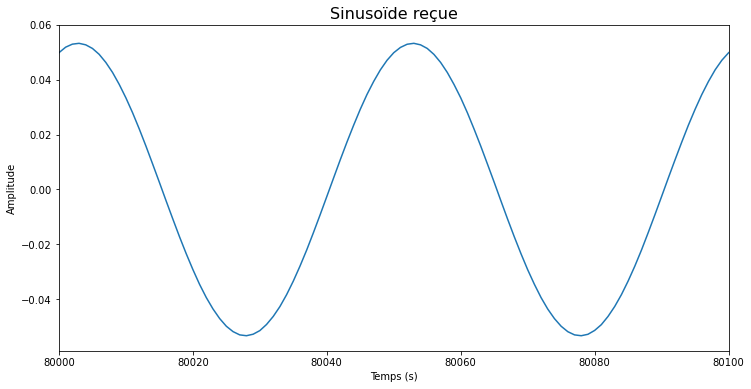

In [398]:
fs = 50000 #Fréquence d'échantillonnage
d = 5 #Temps de réception

print("Start recording")

a = sd.rec(int(d * fs), samplerate=fs, channels=1) #Réception du signal 
sd.wait()

print("End recording")

plt.figure(figsize=(12,6)) #Taille de la figure

ax = plt.axes()
plt.xlim(80000,80100)

ax.plot(a)

ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude")
plt.title("Sinusoïde reçue", fontsize=16)

Text(0.5, 1.0, "Sinusoïde avec traçage d'échantillons")

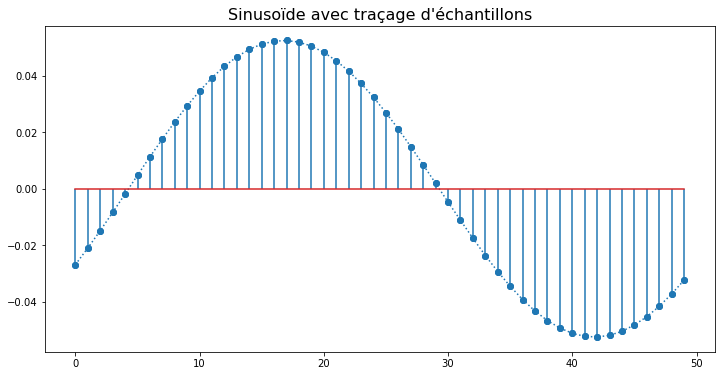

In [396]:
fig = plt.figure(figsize=(12, 6))
plt.plot(a[80000:80050], 'o:')
plt.stem(a[80000:80050])
plt.title("Sinusoïde avec traçage d'échantillons", fontsize=16)

# Calcul de l'amplitude reçue

In [371]:
amplitude = (np.max(a) - np.min(a)) / 2
print(amplitude)
#On utilise le min et le max (et non uniquement le max) car comme le signal est variable, le min et max ne sont pas identiques

0.0705413818359375


# Calcul de la fréquence reçue

In [372]:
motifs = 0
for i in range(len(a[:-1])):
    if a[i] < 0 and a[i + 1] > 0:
        motifs +=1
        
periode = d/motifs
frequence = 1/periode
print("frequence :", frequence, "amplitude :", amplitude)

frequence : 995.8 amplitude : 0.0705413818359375


# Tests (changements de fréquence et amplitude), avec amplitude de 1V et niveau sonore des PC à 30%

# Création de tableaux d'array avec les mesures relevées


In [373]:
amp1 = np.array([0.00579833984375, 0.0616912841796875, 0.133056640625, 0.132415771484375, 0.129608154296875, 
                 0.1356658935546875, 0.1327972412109375, 0.1284942626953125, 0.125274658203125, 0.1222076416015625, 
                 0.11907958984375, 0.115264892578125, 0.1066741943359375, 0.1031341552734375, 0.0945587158203125, 
                 0.080066851806640625, 0.0784759521484375, 0.0587005615234375, 0.0421295166015625, 0.0207135009765625, 
                 0.0102386474609375])
amp2 = np.array([0.5])
amp1 /= amp2
frequArray = ([20, 97.4, 504.79, 752.6, 998.40, 1249.39, 1498.6, 1997.4, 3484.4, 4978.2, 6467.59, 7958.6, 9943.4, 
               11931.4, 13418.4, 14912.6, 16340.8, 17892.39, 18875.8, 19879.6, 20833.8])

# Tracé du gain (dB) avec échelle de fréquence linéaire et semi-log

Avec ces tracés du gain en dB, on cherche à représenter la fréquence de coupure (à -3dB),  correspondant à une puissance de sortie réduite de moitié.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'Gain (dB)')

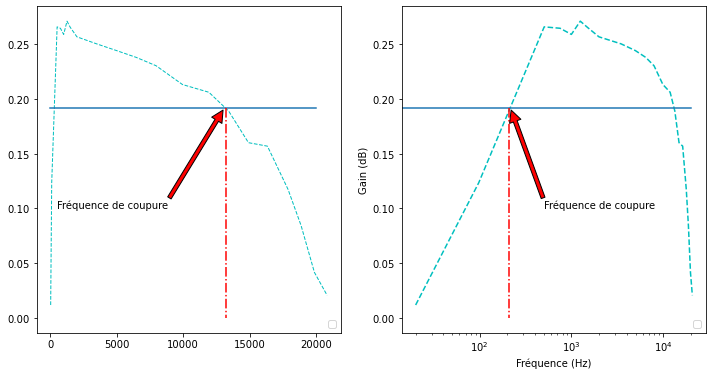

In [395]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(frequArray, amp1, color='c', linewidth=1, linestyle="--")
ax[1].semilogx(frequArray, amp1, color='c', linestyle="--")


freqcou = (np.max(amp1) / np.sqrt(2))
ax[0].plot([0, 20000], [0.1918, 0.1918]) #Traits pleins (fréquence en ordonnée)
ax[1].plot([0, 20000], [0.1918, 0.1918]) #Traits pleins (fréquence en ordonnée)
ax[0].plot([13200, 13200], [0.1918, 0], linestyle="dashdot", color = 'r') #Traits pointillés (fréquence en abscisse)
ax[1].plot([210, 210], [0.1918, 0], linestyle="dashdot", color = 'r') #Traits pointillés (fréquence en abscisse)
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
ax[0].annotate('Fréquence de coupure', xy =(13000,0.19), 
                xytext =(500,0.10),  
                arrowprops = dict(facecolor ='red', 
                                  shrink = 10),) 
ax[1].annotate('Fréquence de coupure', xy =(220,0.19), 
                xytext =(500,0.10),  
                arrowprops = dict(facecolor ='red', 
                                  shrink = 10),)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Gain (dB)")

# Exercice de modélisation d'erreurs théoriques

# 1. Erreurs sur le calcul de l'amplitude

# Cas le plus favorable

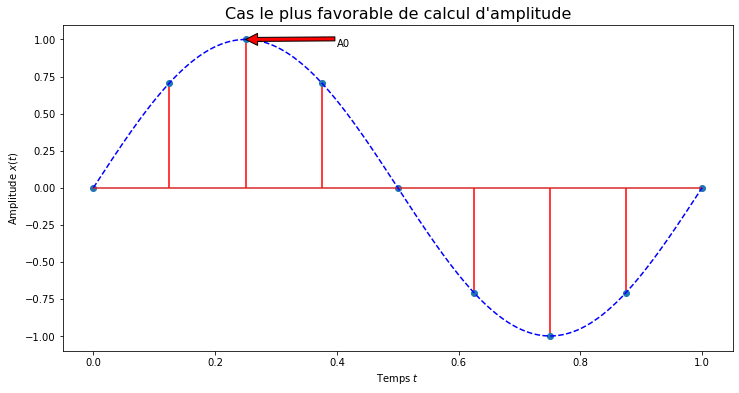

In [390]:
fig = plt.figure(figsize=(12, 6))
T = 1
def signal(t): return np.sin(2. * np.pi * t / T)# Echantillonnage
D = 1. # Duree d'observation
fe = 8 # Frequence d'echantillonnage
N = int(D * fe) + 1 # Nombre de points enregistres
te = np.linspace(0., (N-1)/fe, N) # Grille d'echantillonnage
tp = np.linspace(0., D, 1000) # Grille plus fine pour tracer l'allure du signal parfait
# Trace du signal
plt.stem(te, signal(te), 'or-')
plt.plot(tp, signal(tp), 'b--')
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")
plt.annotate('A0', xy =(0.25,1), 
                xytext =(0.40,0.95),  
                arrowprops = dict(facecolor ='red', 
                                  shrink = 10),) 
plt.title("Cas le plus favorable de calcul d'amplitude", fontsize=16)
plt.show() 

# Cas le moins favorable

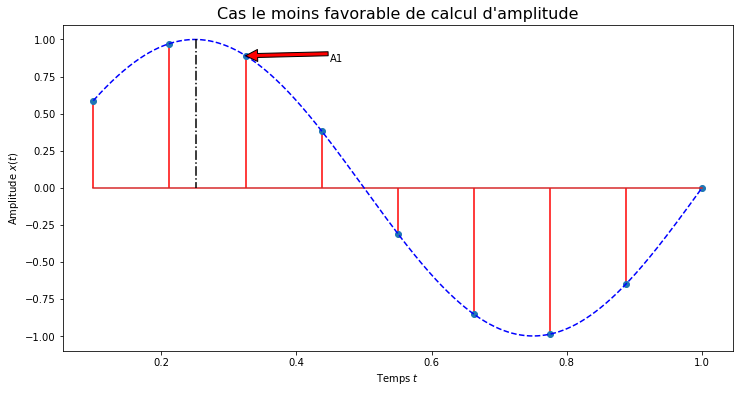

In [389]:
fig = plt.figure(figsize=(12, 6))
T = 1
def signal(t): return np.sin(2. * np.pi * t / T)
# Echantillonnage
D = 1 # Duree d'observation
fe = 8. # Frequence d'echantillonnage
N = int(D * fe) + 1 # Nombre de points enregistres
te = np.linspace(0.1, (N-1)/fe, N) # Grille d'echantillonnage
tp = np.linspace(0.1, D, 1000) # Grille plus fine pour tracer l'allure du signal parfait
# Trace du signal
plt.stem(te, signal(te), 'or-')
plt.plot(tp, signal(tp), 'b--')
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")
plt.annotate('A1', xy =(0.325,0.89), 
                xytext =(0.45,0.85),  
                arrowprops = dict(facecolor ='red', 
                                  shrink = 10),) 
plt.plot([0.252, 0.252], [1, 0], linestyle="dashdot", color = 'k')
plt.title("Cas le moins favorable de calcul d'amplitude", fontsize=16)
plt.show() 

Dans ces cas on a :

- La valeur maximale de la sinusoide est toujour A0 = sin( $\frac{\pi}{2}$ )   
- La valeur de l'échantillon maximal mesuré est le suivant (ou le précédent qui a la même valeur dans le pire des cas), et il est décalé en angle de $\frac{\pi}{N}$. L'échantillon vaut alors : A1 = sin( $\frac{\pi}{2}$ + $\frac{\pi}{N}$ )

L'erreur de mesure en pourcentage est définie par  : (valeur estimée - valeur réelle) / valeur réelle × 100% (en valeur absolue) 

Formule du pourcentage d'erreur : $\frac{valeur estimée - valeur réelle}{valeur réelle} * 100$

# 2. Signal carré de la sinusoïde et calcul de l'erreur de fréquence

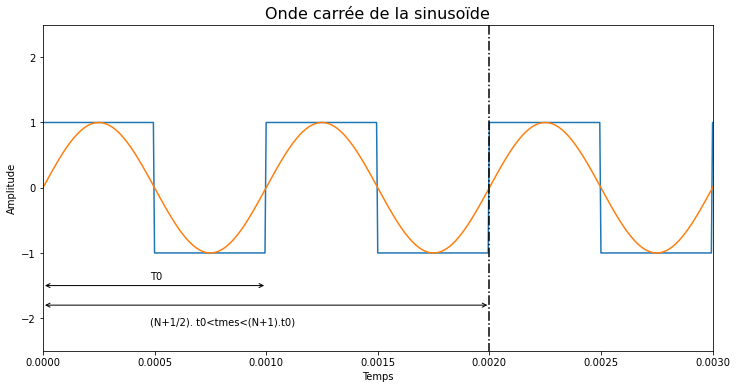

In [380]:
from scipy import signal

def sig(tee): return np.sin(2. * np.pi * t / Tee)

fe = 192000
fsin = 1000
temps = np.arange(0, D, 1/fe)
sinus = np.sin(2 * np.pi *fsin * temps)

plt.figure(figsize=(12, 6))

plt.plot(temps, signal.square(2 * np.pi * fsin *temps))
plt.plot(temps,sinus)
plt.plot([0.0020, 0.0020], [2.5, -2.5], linestyle="dashdot", color = 'k')
plt.annotate('', xy=(0.0,-1.5), xytext=(0.0010, -1.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(0.0,-1.8), xytext=(0.0020, -1.8), arrowprops=dict(arrowstyle='<->'))
plt.xlim(0, 0.003)
plt.ylim(-2.5, 2.5)
plt.text(0.00048,-1.4,'T0')
plt.text(0.00048,-2.1,'(N+1/2). t0<tmes<(N+1).t0)')
plt.title('Onde carrée de la sinusoïde', fontsize=16)
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.show()

Calcul de l'erreur de fréquence : $\frac{(N+\frac{1}{2}) * 2\pi - (N+1) * 2\pi}{(N+1)*2\pi}$

# Liste répartition des tâches 